In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [287]:
df = pd.read_csv("../data/covid19_tweets.csv")
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [288]:
df["source"].value_counts()

source
Twitter Web App               22974
Twitter for Android           16757
Twitter for iPhone            15823
TweetDeck                      3453
Hootsuite Inc.                 2846
                              ...  
Post to Social by SHIFT1          1
PRNewswire                        1
Hep Auto Tweet                    1
Chorus publishing platform        1
Tweecha Lite                      1
Name: count, Length: 450, dtype: int64

In [289]:
def getYear(string):
    return int(string[0:4])


def getDate(string):
    return int(string[5:7])

In [290]:
# List of sources to keep
sources_to_keep = [
    "Twitter Web App",  #
    "Twitter for Android",
    "Twitter for iPhone",
    "TweetDeck",
    "Hootsuite Inc.",
]

# Create a boolean mask where the "source" column contains values to keep
mask = df["source"].isin(sources_to_keep)

# Use the mask to filter the DataFrame and keep only the rows with the specified sources
df = df[mask]

# Apply label encoding to the categorical column
df["source"] = label_encoder.fit_transform(df["source"])

In [291]:
df["user_verified"] = df["user_verified"].astype(int)
df["user_created"] = df["user_created"].apply(lambda x: getYear(x))
df["date"] = df["date"].apply(lambda x: getDate(x))
df["user_friends"] = df["user_friends"].apply(int)

In [292]:
label_encoder = LabelEncoder()

df["user_location"] = label_encoder.fit_transform(df["user_location"])
df["user_verified"] = label_encoder.fit_transform(df["user_verified"])
df["user_friends"] = label_encoder.fit_transform(df["user_friends"])

In [293]:
df = df[
    [
        "source",
        "user_location",
        "user_verified",
        "user_friends",
        "user_created",
        "date",
        "user_followers",
    ]
]

df

,source,user_location,user_verified,user_friends,user_created,date,user_followers
0,4,11969,0,950,2017,7,624
1,3,7416,1,1676,2009,7,2253
2,3,8300,0,5778,2009,7,9275
3,4,9998,0,987,2019,7,197
4,3,5083,0,168,2017,7,101009
...,...,...,...,...,...,...,...
74429,4,5844,0,586,2010,8,85
74430,2,13032,0,1066,2013,8,4289
74431,2,12906,0,102,2018,8,1413
74432,4,13042,0,1732,2014,8,2554


In [294]:
df.corr()

,source,user_location,user_verified,user_friends,user_created,date,user_followers
source,1.000000,0.046876,-0.219887,0.003563,0.088213,0.012538,-0.120232
user_location,0.046876,1.000000,-0.105183,-0.055843,0.162053,0.009544,-0.059731
user_verified,-0.219887,-0.105183,1.000000,-0.012433,-0.204305,-0.028573,0.324781
user_friends,0.003563,-0.055843,-0.012433,1.000000,-0.287723,0.031014,-0.040182
user_created,0.088213,0.162053,-0.204305,-0.287723,1.000000,-0.021540,-0.123444
date,0.012538,0.009544,-0.028573,0.031014,-0.021540,1.000000,-0.023422
user_followers,-0.120232,-0.059731,0.324781,-0.040182,-0.123444,-0.023422,1.000000


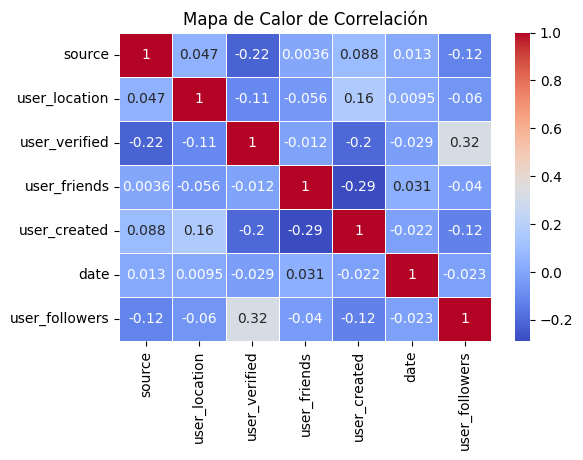

In [295]:
correlation_matrix = df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor de Correlación")
plt.show()

In [296]:
df = df[["user_created", "user_location", "source"]]
df

,user_created,user_location,source
0,2017,11969,4
1,2009,7416,3
2,2009,8300,3
3,2019,9998,4
4,2017,5083,3
...,...,...,...
74429,2010,5844,4
74430,2013,13032,2
74431,2018,12906,2
74432,2014,13042,4


In [297]:
df.corr()

,user_created,user_location,source
user_created,1.000000,0.162053,0.088213
user_location,0.162053,1.000000,0.046876
source,0.088213,0.046876,1.000000


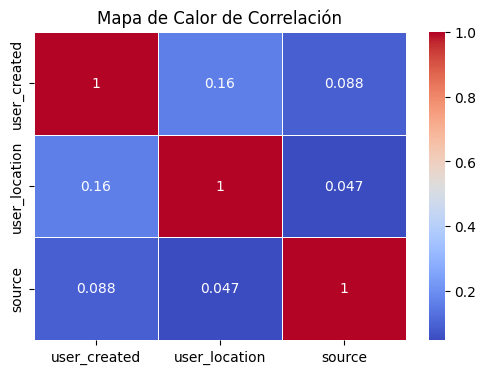

In [298]:
correlation_matrix = df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor de Correlación")
plt.show()

In [299]:
df["source"].value_counts()

# Twitter Web App               22974
# Twitter for Android           16758
# Twitter for iPhone            15824
# TweetDeck                      3453
# Hootsuite Inc.                 2846

source
2    22974
3    16757
4    15823
1     3453
0     2846
Name: count, dtype: int64

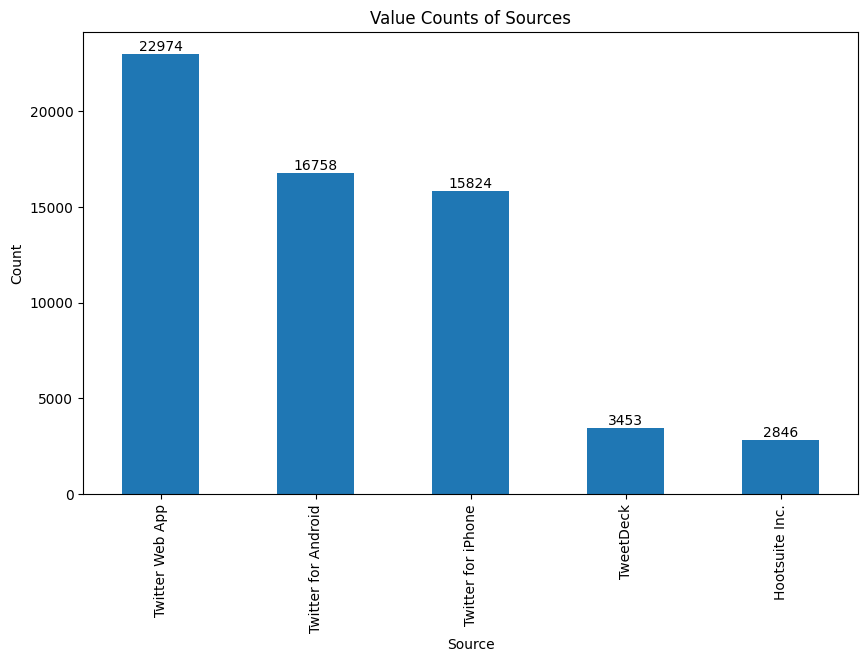

In [300]:
# Sample DataFrame with a "source" column
data = {
    "source": ["Twitter Web App"] * 22974
    + ["Twitter for Android"] * 16758
    + ["Twitter for iPhone"] * 15824
    + ["TweetDeck"] * 3453
    + ["Hootsuite Inc."] * 2846
}

df2 = pd.DataFrame(data)

# Calculate the value counts for the "source" column
value_counts = df2["source"].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
ax = value_counts.plot(kind="bar")
plt.xlabel("Source")
plt.ylabel("Count")
plt.title("Value Counts of Sources")

# Add counts on top of the bars
for i, count in enumerate(value_counts):
    ax.text(i, count, str(count), ha="center", va="bottom")

plt.show()

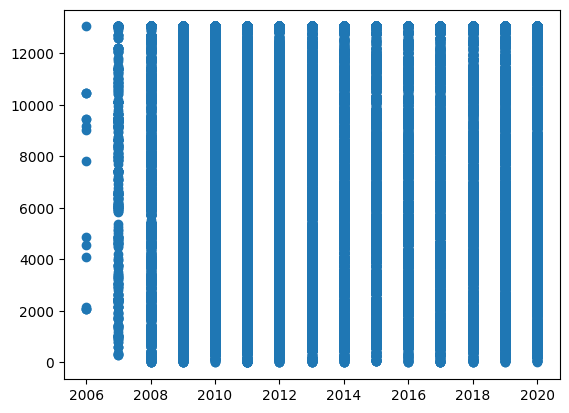

In [301]:
df3 = df[df["user_created"] > 1970]
plt.scatter(df3["user_created"], df3["user_location"])